In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### 1. Import the dataset

In [3]:
df = pd.read_csv(r"https://raw.githubusercontent.com//SR1608//Datasets//main//covid-data.csv")

In [4]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. High Level Data Understanding

In [5]:
df.shape

(57394, 49)

In [6]:
print("Number of rows in dataset : ")
df.shape[0]

Number of rows in dataset : 


57394

In [7]:
print("Number of columns in dataset : ")
df.shape[1]

Number of columns in dataset : 


49

In [8]:
print("Data types of columns :")
df.dtypes

Data types of columns :


iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [9]:
a = df.info()
pd.DataFrame(a)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

""


In [10]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


#### 3. Low Level Data Understanding

In [11]:
print("Count of unique values in 'location' column : ")

df["location"].value_counts().count()

Count of unique values in 'location' column : 


216

In [12]:
print("Continent with maximum frequency value counts : ")

maxi_freq = df["location"].value_counts()
print(maxi_freq.index[0])
print(maxi_freq.iloc[0])

Continent with maximum frequency value counts : 
Afghanistan
323


In [13]:
print("Maximum and mean values in 'total_cases' : ")

max_tc = df["total_cases"].max()
mean_tc = df["total_cases"].mean()
print("maximum : ", max_tc)
print("mean : ", mean_tc)

Maximum and mean values in 'total_cases' : 
maximum :  55154651.0
mean :  167797.3688753302


In [14]:
print("Quartile values in total_deaths : ")

Q = df["total_deaths"].quantile([0.25, 0.5, 0.75])

print(Q)

Quartile values in total_deaths : 
0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [15]:
print("Continent with maximum 'human_development_index' : ")

maxi = df["human_development_index"].max()
print(maxi)

Continent with maximum 'human_development_index' : 
0.953


In [16]:
max_index = df.loc[df["human_development_index"] == 0.953]
max_index

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
38632,NOR,Europe,Norway,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
38633,NOR,Europe,Norway,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
38634,NOR,Europe,Norway,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
38635,NOR,Europe,Norway,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
38636,NOR,Europe,Norway,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38950,NOR,Europe,Norway,13/11/20,26503.0,618.0,561.143,291.0,6.0,1.000,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
38951,NOR,Europe,Norway,14/11/20,27226.0,723.0,571.571,294.0,3.0,1.286,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
38952,NOR,Europe,Norway,15/11/20,27226.0,0.0,571.571,294.0,0.0,1.286,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953
38953,NOR,Europe,Norway,16/11/20,27226.0,0.0,571.571,294.0,0.0,1.286,...,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.6,82.4,0.953


In [17]:
print("The continent is : ")

max_cont = max_index["continent"].values
lst_cont = max_cont.tolist()
lst_cont[0]

The continent is : 


'Europe'

In [18]:
print("Continent with minimum 'gdp_per_capita' : ")

mini = df["gdp_per_capita"].min()
print(mini)

Continent with minimum 'gdp_per_capita' : 
661.24


In [19]:
min_gdp = df.loc[df["gdp_per_capita"] == 661.24]
min_gdp

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10259,CAF,Africa,Central African Republic,16/03/20,1.0,1.0,NaN,NaN,0.0,NaN,...,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.367
10260,CAF,Africa,Central African Republic,17/03/20,1.0,0.0,NaN,NaN,0.0,NaN,...,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.367
10261,CAF,Africa,Central African Republic,18/03/20,1.0,0.0,NaN,NaN,0.0,NaN,...,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.367
10262,CAF,Africa,Central African Republic,19/03/20,1.0,0.0,NaN,NaN,0.0,NaN,...,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.367
10263,CAF,Africa,Central African Republic,20/03/20,1.0,0.0,NaN,NaN,0.0,NaN,...,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,CAF,Africa,Central African Republic,13/11/20,4888.0,4.0,1.857,62.0,0.0,0.000,...,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.367
10502,CAF,Africa,Central African Republic,14/11/20,4888.0,0.0,1.857,62.0,0.0,0.000,...,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.367
10503,CAF,Africa,Central African Republic,15/11/20,4896.0,8.0,2.429,63.0,1.0,0.143,...,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.367
10504,CAF,Africa,Central African Republic,16/11/20,4900.0,4.0,3.000,63.0,0.0,0.143,...,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.367


In [20]:
print("The continent is : ")

min_cont = min_gdp["continent"].values
lst_conti = min_cont.tolist()
lst_conti[0]

The continent is : 


'Africa'

#### 4. Dataframe Filtering

In [21]:
new_df = df[["continent", "location","date","total_cases","total_deaths","gdp_per_capita","human_development_index"]]
new_df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


In [22]:
new_df.shape

(57394, 7)

#### 5. Data Cleaning

In [23]:
print("Eliminate duplicate values")

Eliminate duplicate values


In [24]:
duplicate = new_df.duplicated()
print(duplicate.sum())
new_df[duplicate]

0


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index


In [25]:
new_df.drop_duplicates(inplace = True)
new_df.shape

(57394, 7)

In [26]:
print("Get missing value count ")

new_df.isnull().sum()

Get missing value count 


continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [27]:
print("Remove observations where 'continent' column value is missing ")

new_df.dropna(["continent"] == 'Nan', inplace = True)

Remove observations where 'continent' column value is missing 


In [28]:
new_df.shape

(37899, 7)

In [29]:
print("Fill all missing values with 0 ")

new_df.replace(np.nan, 0, inplace = True)
new_df.sample(5)

Fill all missing values with 0 


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
9329,Africa,Cameroon,19/07/20,16157.0,373.0,3364.926,0.556
5783,Africa,Benin,21/08/20,2095.0,39.0,2064.236,0.515
50853,Africa,Tanzania,03/08/20,509.0,21.0,2683.304,0.538
44350,Africa,Sao Tome and Principe,13/08/20,882.0,15.0,3052.714,0.589
14383,Europe,Denmark,24/07/20,13390.0,612.0,46682.515,0.929


In [30]:
new_df.isnull().sum()

continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
gdp_per_capita             0
human_development_index    0
dtype: int64

#### 6. Date-Time Format

In [31]:
print("DATE-TIME FORMAT")

new_df["date"] = pd.to_datetime(df["date"])
new_df.info()

DATE-TIME FORMAT
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37899 entries, 84 to 56747
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   continent                37899 non-null  object        
 1   location                 37899 non-null  object        
 2   date                     37899 non-null  datetime64[ns]
 3   total_cases              37899 non-null  float64       
 4   total_deaths             37899 non-null  float64       
 5   gdp_per_capita           37899 non-null  float64       
 6   human_development_index  37899 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 2.3+ MB


In [32]:
print("extract month data from 'date' column ")

new_df['month'] = pd.DatetimeIndex(new_df['date']).month
new_df

extract month data from 'date' column 


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
84,Asia,Afghanistan,2020-03-24,40.0,1.0,1803.987,0.498,3
85,Asia,Afghanistan,2020-03-25,42.0,1.0,1803.987,0.498,3
86,Asia,Afghanistan,2020-03-26,75.0,1.0,1803.987,0.498,3
87,Asia,Afghanistan,2020-03-27,75.0,1.0,1803.987,0.498,3
88,Asia,Afghanistan,2020-03-28,91.0,2.0,1803.987,0.498,3
...,...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535,11
56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535,11
56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535,11
56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535,11


#### 7. Data Aggregation

In [33]:
print("Fetch Maximum values of all columns grouped by 'continent'")

grouped = new_df.groupby("continent").max()
grouped

Fetch Maximum values of all columns grouped by 'continent'


,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
continent,,,,,,,
Africa,Zimbabwe,2020-12-11,752269.0,20314.0,22604.873,0.790,12
Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.932,12
Europe,United Kingdom,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
North America,United States,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
Oceania,Papua New Guinea,2020-12-11,27750.0,907.0,44648.710,0.939,12
South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [34]:
print("Reset index")

df_groupby = grouped.reset_index()
df_groupby

Reset index


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,22604.873,0.790,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.932,12
2,Europe,United Kingdom,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Papua New Guinea,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


#### 8. Feature Engineering

In [35]:
df_groupby["total_deaths_to_total_cases"] = (df_groupby["total_deaths"]/df_groupby["total_cases"].values)
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,22604.873,0.790,12,0.027004
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.932,12,0.014708
2,Europe,United Kingdom,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Papua New Guinea,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12,0.028251


#### 9. Data Visualization

Univariate Analysis on 'gdp_per_capita' with histogram 


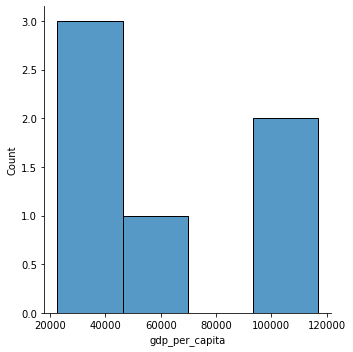

In [36]:
print("Univariate Analysis on 'gdp_per_capita' with histogram ")

sns.displot(df_groupby['gdp_per_capita'])

Scatter plot of 'total_cases' vs 'gdp_per_capita' 


<AxesSubplot:xlabel='total_cases', ylabel='gdp_per_capita'>

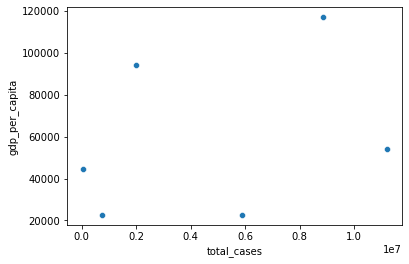

In [37]:
print("Scatter plot of 'total_cases' vs 'gdp_per_capita' ")

sns.scatterplot(x = df_groupby['total_cases'], y = df_groupby['gdp_per_capita'])

Pair plot of 'df_groupby'


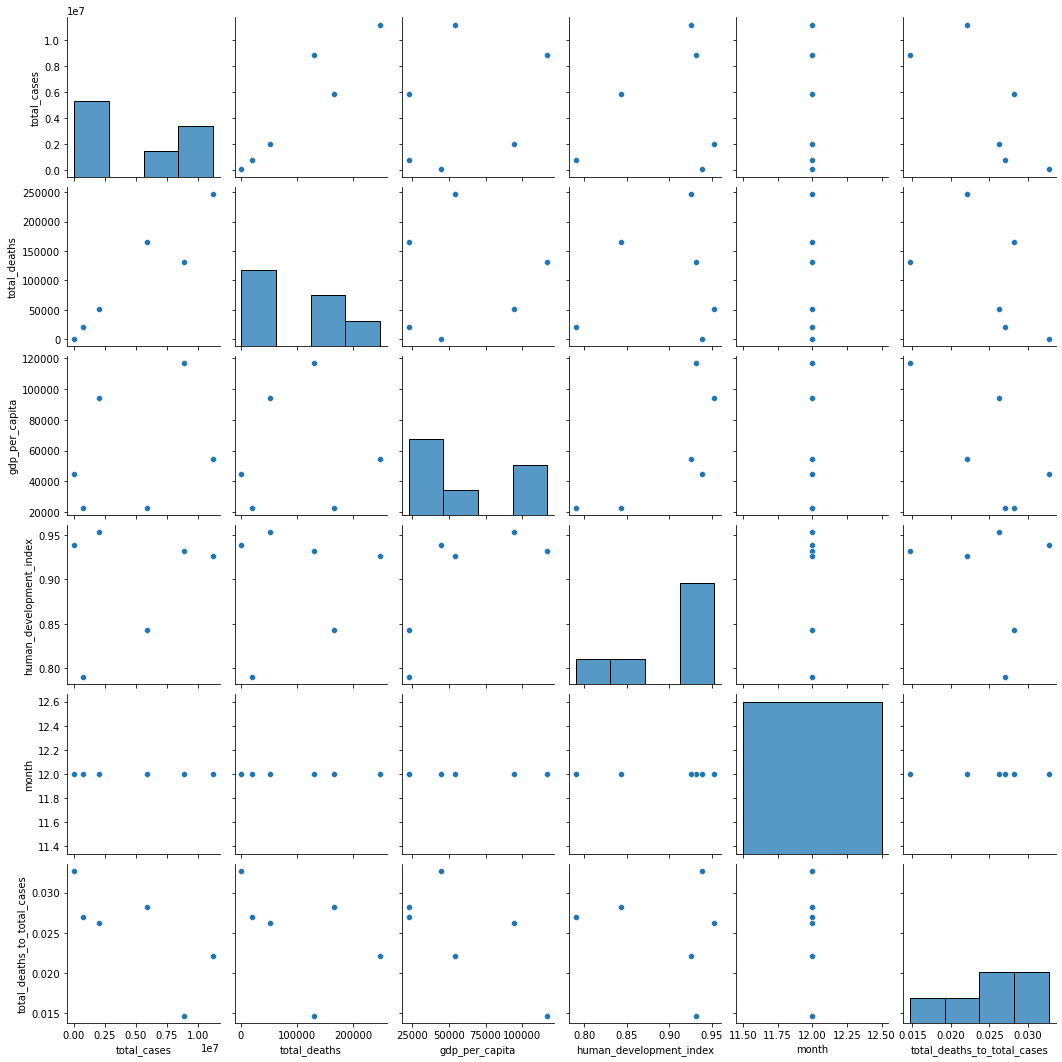

In [38]:
print("Pair plot of 'df_groupby'")

sns.pairplot(df_groupby)

Bar plot, continent vs total_cases 


<AxesSubplot:xlabel='continent', ylabel='total_cases'>

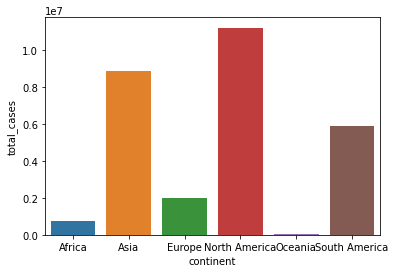

In [39]:
print("Bar plot, continent vs total_cases ")

sns.barplot(data = df_groupby, x = 'continent', y = 'total_cases')

Cat plot, continent vs total_cases, kind = 'bar' 


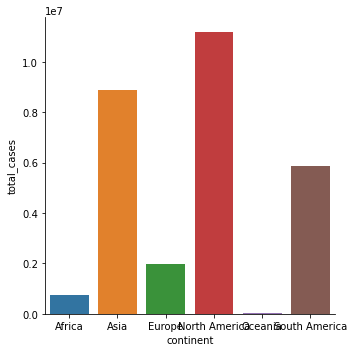

In [40]:
print("Cat plot, continent vs total_cases, kind = 'bar' ")

sns.catplot(data = df_groupby, x = 'continent', y = 'total_cases', kind = 'bar')

#### 10. df to .csv

In [41]:
df_groupby.to_csv('df_groupby.csv', index = False)